In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# we will use the make_moon dataset from Sklearn

from sklearn.datasets import make_moons

In [4]:
x, y =make_moons(n_samples=500, noise=0.05)

In [5]:
# now prepare the dataset

df = {"data1": x[:,0], "data2": x[:,1], "output": y}

dataset =pd.DataFrame(df)
dataset.head(3)

,data1,data2,output
0,0.363615,0.994466,0
1,1.455724,-0.313907,1
2,0.949579,0.280725,0


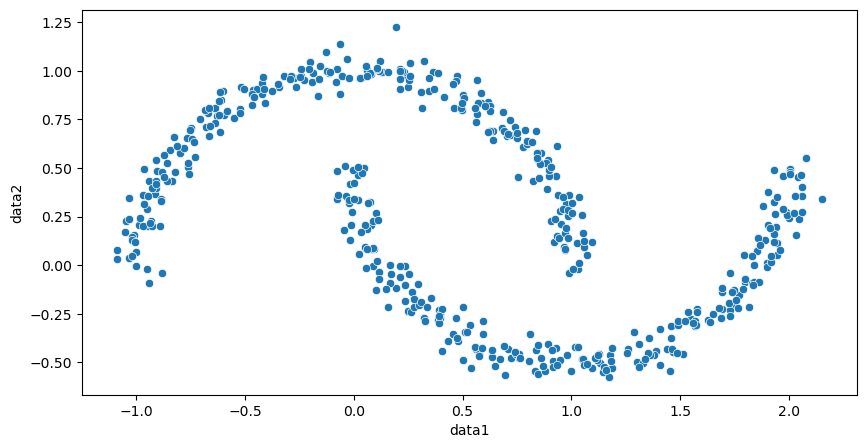

In [7]:
# now view the scatterplot for this data

plt.figure(figsize=(10, 5))
sns.scatterplot(x="data1", y="data2", data= dataset)
plt.show()

In [8]:
# now use the dbscan clustering

from sklearn.cluster import DBSCAN

In [12]:
db = DBSCAN(eps=0.2, min_samples=5)

In [10]:
# before fitting the model we need to remove the output from the dataset 

new_dataset = dataset.iloc[:, :-1]
new_dataset.head(3)

,data1,data2
0,0.363615,0.994466
1,1.455724,-0.313907
2,0.949579,0.280725


In [13]:
# now fit predict the DBSCAN

db.fit_predict(new_dataset)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [14]:
# now add a new column in new dataset for this prediction

new_dataset["DB_Predict"] = db.fit_predict(new_dataset)

In [15]:
new_dataset.head(3)

,data1,data2,DB_Predict
0,0.363615,0.994466,0
1,1.455724,-0.313907,1
2,0.949579,0.280725,0


<Figure size 1000x700 with 0 Axes>

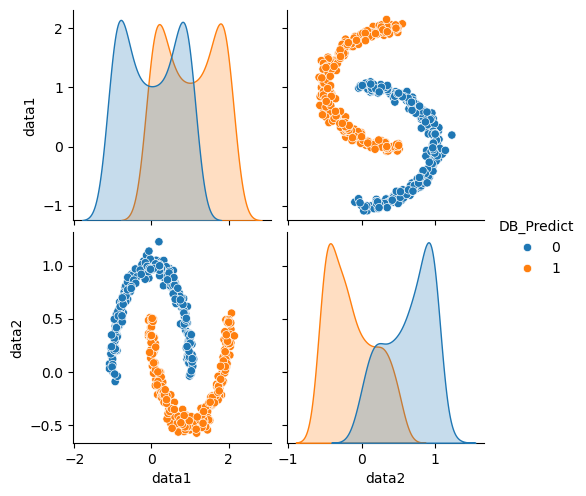

In [19]:
# now plot the pairplot for this

plt.figure(figsize=(10, 7))
sns.pairplot(data=new_dataset, hue="DB_Predict")
plt.show()

In [20]:
# now you could see that it group data perfectly

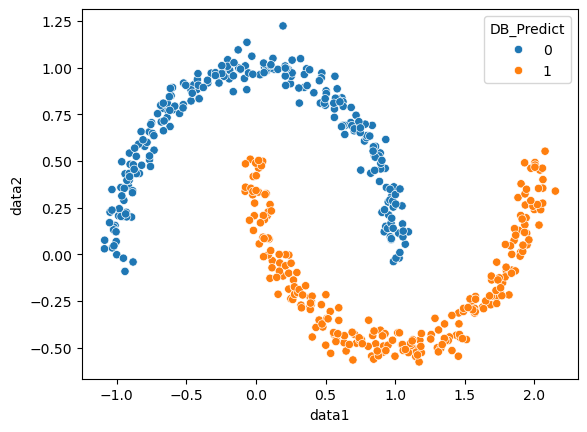

In [21]:
# now check the data in scatter plot

sns.scatterplot(x="data1", y="data2", data=new_dataset, hue="DB_Predict")
plt.show()

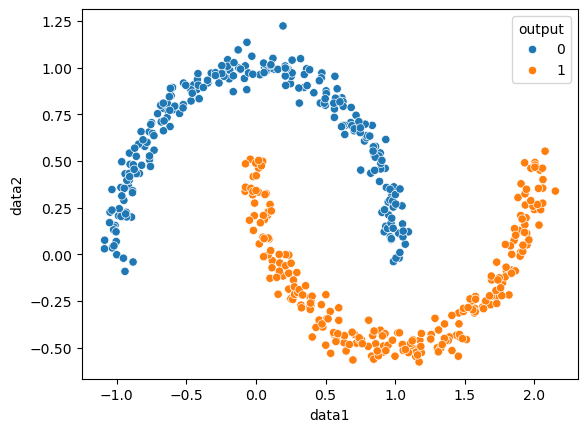

In [22]:
# now check the same in main dataset with Y

sns.scatterplot(x="data1", y="data2", data= dataset, hue="output")
plt.show()

In [ ]:
# both actual or trained using DBSCAN looks good.